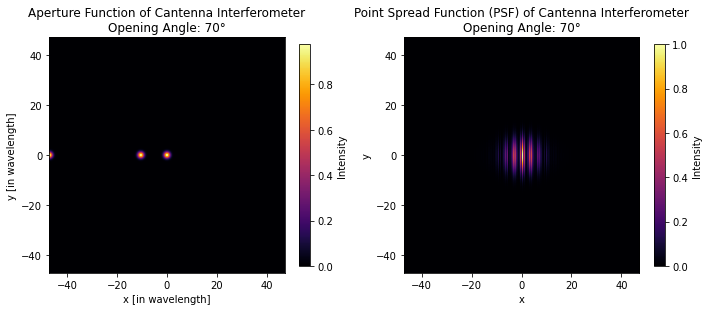

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set Parameters
wavel = 0.21  # Wavelength of Observation (21 cm)
baselines_x = np.array([0, 2.2, 9.9])/wavel  # Baseline x component in wavelength
baselines_y = np.array([0,0,0])/wavel # Baseline y component in wavelength
grid_size = 256  # Size of 2D grid for Aperture/PSF image
x = np.linspace(-max(baselines_x), max(baselines_x), grid_size)  # x-Coordinates
y = np.linspace(-max(baselines_x), max(baselines_x), grid_size)  # y-Coordinates
X, Y = np.meshgrid(x, y)

# Opening Angle in Radians 
opening_angle_deg = 70  # Opening Angle in degrees
opening_angle_rad = np.radians(opening_angle_deg)  # Conversion to Radians

# Standard Deviation for Gaussian function
sigma = np.tan(opening_angle_rad / 2)  # depends on opening angle

# Aperture Function of Cantenna interferometer
def aperture_function(x, y, baselines_x, baselines_y, sigma):
    aperture = np.zeros_like(x)

    # based on positions of Cantenna, build Aperture Function
    for i in range(0,len(baselines_x)):
        pos_x = baselines_x[i]  
        pos_y = baselines_y[i]
        
        # Gaussian function
        aperture += np.exp(-((x + pos_x)**2 + (y+pos_y)**2) / (sigma**2))
        

    return aperture

# Calculate Aperture Function
A = aperture_function(X, Y, baselines_x, baselines_y, sigma)

# Fourier Transform of Aperture Function
PSF = np.fft.fftshift(np.fft.fft2(A))

# Calculate Intensity of PSF
PSF_intensity = np.abs(PSF)**2

# Normalisation of PSF
PSF_intensity /= np.max(PSF_intensity)

# plot aperture function
plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(A, extent=(-max(baselines_x), max(baselines_x),-max(baselines_x), max(baselines_x)), cmap='inferno')
plt.colorbar(label='Intensity',shrink=0.4)
plt.title(f'Aperture Function of Cantenna Interferometer\nOpening Angle: {opening_angle_deg}°')
plt.xlabel('x [in wavelength]')
plt.ylabel('y [in wavelength]')

# plot PSF
plt.subplot(122)
plt.imshow(PSF_intensity, extent=(-max(baselines_x), max(baselines_x),-max(baselines_x), max(baselines_x)), cmap='inferno')
plt.colorbar(label='Intensity',shrink=0.4)
plt.title(f'Point Spread Function (PSF) of Cantenna Interferometer\nOpening Angle: {opening_angle_deg}°')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('PSF_Interferometer.png',dpi=500,bbox_inches='tight')
plt.show()